In [1]:
import numpy as np
import matplotlib.pyplot as plt

from squlearn import Executor
from squlearn.feature_map import ChebPQC
from squlearn.expectation_operator import SummedPaulis
from squlearn.qnn import QNNRegressor, SquaredLoss
from squlearn.optimizers import Adam

Define parameterized quantum circuit $Q(x,\theta)$

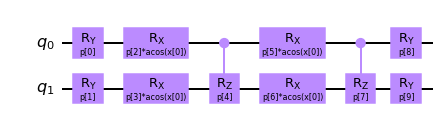

In [2]:
nqubits = 2
pqc = ChebPQC(num_qubits=nqubits, num_features=1, num_layers=2)
pqc.draw()

Definition of the cost operator:
$\hat{H} = J \sum\limits_{i < j} Z_i Z_j + h\sum\limits_i Z_i + c$

In [3]:
op = SummedPaulis(2)
print(op)

SparsePauliOp(['II', 'IZ', 'ZI'],
              coeffs=[ParameterExpression(1.0*p[0]), ParameterExpression(1.0*p[1]),
 ParameterExpression(1.0*p[2])])


Example function: $log(x)$

In [4]:
x_space = np.arange(-0.5, 0.6, 0.1)
ref_values = np.square(x_space)

np.random.seed(13)
param_ini = np.random.rand(pqc.num_parameters)
param_op_ini = np.ones(op.num_parameters)

reg = QNNRegressor(pqc, op, Executor("statevector_simulator"), SquaredLoss(), Adam({"lr":0.1}), param_ini, param_op_ini)

AttributeError: 'QNNRegressor' object has no attribute 'pretrained'

Optimization of the regression

In [ ]:
reg.fit(x_space, ref_values)

In [ ]:
print("Result Param:", reg.param)
print("Result ParamOp:", reg.param_op)

In [ ]:
x = np.arange(np.min(x_space), np.max(x_space)+0.01, 0.01)
y = reg.predict(x)
plt.plot(x, np.square(x))
plt.plot(x, y)

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options, Estimator, Sampler
from qiskit_aer.noise import NoiseModel

# User token has to be set in  advance file via save_account()
service = QiskitRuntimeService(channel="ibm_quantum")
noisy_backend = service.get_backend('ibm_nairobi')
backend_noise_model = NoiseModel.from_backend(noisy_backend)
simulator = service.get_backend('ibmq_qasm_simulator')
session = Session(service,backend=simulator)

executor_backend = Executor(Estimator(session),caching=False)
qnn_backend = QNNRegressor(pqc, op, executor_backend, SquaredLoss(), Adam(), reg.param, reg.param_op, caching=False)

In [ ]:
options = Options()
options.simulator = {
    "noise_model": backend_noise_model,
    "coupling_map": noisy_backend.configuration().coupling_map,
    "basis_gates": noisy_backend.configuration().basis_gates
}
options.execution.shots = 10000


In [ ]:
options.resilience_level = 0
options.optimization_level = 0

executor_backend.reset_options_estimator(options)

x = np.arange(np.min(x_space), np.max(x_space)+0.01, 0.01)
y = qnn_backend.predict(x)
plt.plot(x, np.square(x))
plt.plot(x, y)

In [ ]:
options.resilience_level = 1
options.optimization_level = 1

executor_backend.reset_options_estimator(options)

x = np.arange(np.min(x_space), np.max(x_space)+0.01, 0.01)
y = qnn_backend.predict(x)
plt.plot(x, np.square(x))
plt.plot(x, y)

In [ ]:
options.resilience_level = 1
options.optimization_level = 2

executor_backend.reset_options_estimator(options)

x = np.arange(np.min(x_space), np.max(x_space)+0.01, 0.01)
y = qnn_backend.predict(x)
plt.plot(x, np.square(x))
plt.plot(x, y)

In [ ]:
options.resilience_level = 1
options.optimization_level = 3

executor_backend.reset_options_estimator(options)

x = np.arange(np.min(x_space), np.max(x_space)+0.01, 0.01)
y = qnn_backend.predict(x)
plt.plot(x, np.square(x))
plt.plot(x, y)

In [ ]:
session = Session(service,backend=simulator)

executor_backend = Executor(Sampler(session),caching=False)
qnn_backend = QNNRegressor(pqc, op, executor_backend, SquaredLoss(), Adam(), reg.param, reg.param_op, caching=False)

In [ ]:
options.resilience_level = 0
options.optimization_level = 0

executor_backend.reset_options_sampler(options)

x = np.arange(np.min(x_space), np.max(x_space)+0.01, 0.01)
y = qnn_backend.predict(x)
plt.plot(x, np.square(x))
plt.plot(x, y)

In [ ]:
options.resilience_level = 1
options.optimization_level = 1

executor_backend.reset_options_sampler(options)

x = np.arange(np.min(x_space), np.max(x_space)+0.01, 0.01)
y = qnn_backend.predict(x)
plt.plot(x, np.square(x))
plt.plot(x, y)

In [ ]:
qnn_backend = QNNRegressor(pqc, op, executor_backend, SquaredLoss(), Adam({"lr":0.1}), param_ini, param_op_ini, variance=0.001, caching=True)

options.resilience_level = 0
options.optimization_level = 0

executor_backend.reset_options_estimator(options)

In [ ]:
if False:
    qnn_backend.fit(x_space, ref_values)
else
    param = np.array([1.40117172, 0.61107008, 0.99124818, 0.96892179, 1.02999658, 0.55958741,
                      0.93947114, 0.72715296, 0.83944837, 0.75572051])
    param_op = np.array([0.95250274, 0.44728365, 0.80368924])

    qnn_backend.set_params(param=param, param_op=param_op)
    qnn_backend.set_params(is_fitted=True)

In [ ]:
x = np.arange(np.min(x_space), np.max(x_space)+0.01, 0.01)
y = qnn_backend.predict(x)
plt.plot(x, np.square(x))
plt.plot(x, y)